# 1. Data Quality & EDA - Titanic

**Goal:** Conduct a rigorous audit of the passenger manifest and visually audit survival patterns.

**Focus:**
- Missing Value Audit
- Univariate & Bivariate distributions
- Survival rate analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
df = sns.load_dataset('titanic')

## 1. Automated Data Quality Report

In [2]:
dq_report = pd.DataFrame(index=df.columns)
dq_report['Null_Count'] = df.isnull().sum()
dq_report['Null_%'] = (df.isnull().sum() / len(df) * 100).round(2)
dq_report['Uniques'] = df.nunique()
dq_report.sort_values(by='Null_%', ascending=False)

,Null_Count,Null_%,Uniques
deck,688,77.22,7
age,177,19.87,88
embarked,2,0.22,3
embark_town,2,0.22,3
survived,0,0.00,2
pclass,0,0.00,3
sex,0,0.00,2
sibsp,0,0.00,7
parch,0,0.00,7
fare,0,0.00,248


## 2. Survival Distribution

Overall Survival Rate: 38.38%


C:\Users\Ravikiran Bhonagiri\AppData\Local\Temp\ipykernel_22668\1721822544.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='survived', data=df, palette='Set2')


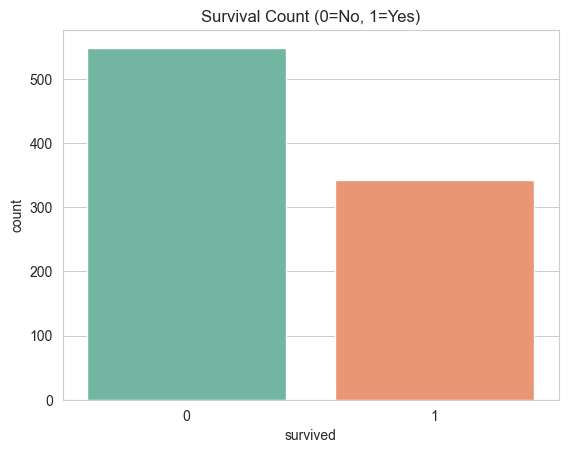

In [3]:
avg_survival = df['survived'].mean()
print(f"Overall Survival Rate: {avg_survival:.2%}")

sns.countplot(x='survived', data=df, palette='Set2')
plt.title('Survival Count (0=No, 1=Yes)')
plt.show()

## 3. Survival Factors: Sex & Class

C:\Users\Ravikiran Bhonagiri\AppData\Local\Temp\ipykernel_22668\75539522.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sex', y='survived', data=df, ax=axes[0], palette='muted')


C:\Users\Ravikiran Bhonagiri\AppData\Local\Temp\ipykernel_22668\75539522.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='pclass', y='survived', data=df, ax=axes[1], palette='viridis')


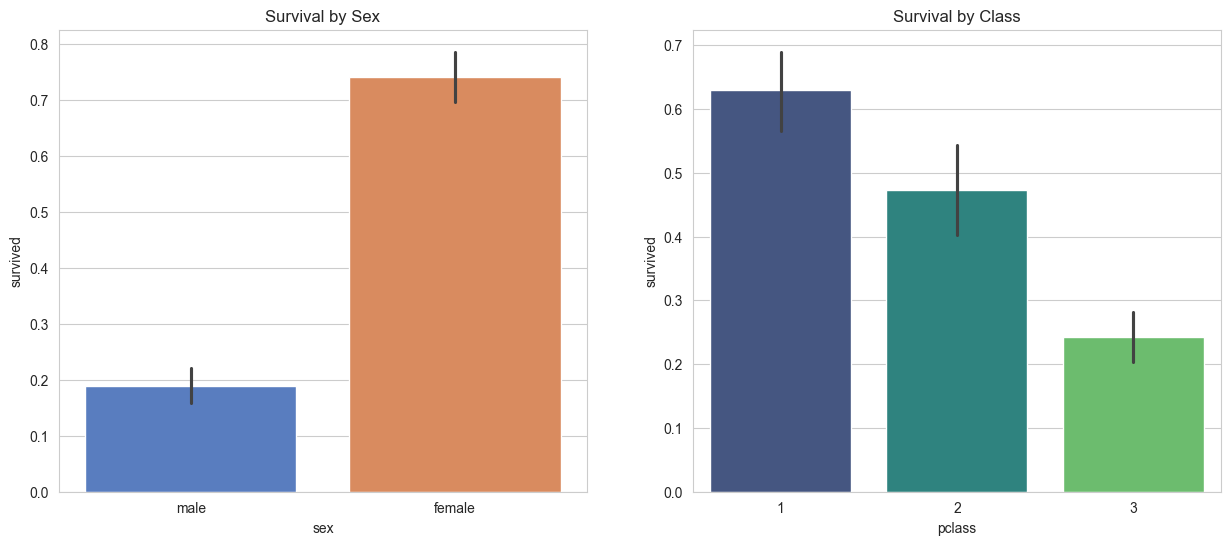

In [4]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.barplot(x='sex', y='survived', data=df, ax=axes[0], palette='muted')
axes[0].set_title('Survival by Sex')

sns.barplot(x='pclass', y='survived', data=df, ax=axes[1], palette='viridis')
axes[1].set_title('Survival by Class')

plt.show()

## Conclusion

Clear biases exist in the data: Females and Higher-Class passengers were statistically more likely to survive, confirming historical protocol adherence.